**Bipartite networks** also known as two-mode networks, are a mechanism for representing relationships between items that belong to 2 or more classes or parts (such as students and professors or airlines and airports).

You can build bipartite networks naturally because quite often real-world datasets already include noes of over 1 type. However, they are not easy to analyze and interpret. For starters, even such a basic measure as node degree may be of questionable use in a bipartite network. Indeed, does a company node with one hundred adjacent employee nodes have the same degree as an employee node with one hundred adjacent company nodes.

## 1. Basic Bipartite Functions

In [53]:
from networkx.algorithms import bipartite
import networkx as nx
import pickle
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import pandas as pd

1.1 Function <mark>*is_bipartite*</mark> is used to check whether the graph is bipartite or not

In [5]:
N = pickle.load(open(r'E:\OneDrive - 同济大学\03 - 阅读\network analysis\complex network analysis in python_code\code\nutrients.pickle','rb'))
bipartite.is_bipartite(N)

True

1.2 Function <mark>*bipartite.sets()*</mark> splits the nodes of a bipartite network into two parts (and returns two node sets). The function does not look at the node attributes. <mark>The separation it performs is based purely on the network topology.</mark> It is your responsibility to recognize the meaning of each part.

In [9]:
bip1, bip2 = bipartite.sets(N)
print('bip1:{}'.format(bip1))
print('bip2:{}'.format(bip2))

bip1:{'Thiamin', 'Cu', 'B6', 'Zn', 'D', 'Niacin', 'E', 'B12', 'Riboflavin', 'Se', 'Ca', 'Folates', 'Mn', 'C', 'A'}
bip2:{'Wheat', 'Asparagus', 'Beef', 'Pumpkins', 'Cheese', 'Nuts', 'Yogurt', 'Beans', 'Poultry', 'Shellfish', 'Milk', 'Green Leafy Vegs', 'Kidneys', 'Fatty Fish', 'Eggs', 'Broccoli', 'Carrots', 'Liver', 'Legumes', 'Potatoes', 'Mushrooms', 'Tomatoes', 'Spinach', 'Seeds', 'Whole Grains', 'Veg Oils'}


In [11]:
foods, nutrients = (bip1, bip2) if 'C' in bip2 else (bip2, bip1)
print('foods:{}\n'.format(foods))
print('nutrients:{}'.format(nutrients))

foods:{'Wheat', 'Asparagus', 'Beef', 'Pumpkins', 'Cheese', 'Nuts', 'Yogurt', 'Beans', 'Poultry', 'Shellfish', 'Milk', 'Green Leafy Vegs', 'Kidneys', 'Fatty Fish', 'Eggs', 'Broccoli', 'Carrots', 'Liver', 'Legumes', 'Potatoes', 'Mushrooms', 'Tomatoes', 'Spinach', 'Seeds', 'Whole Grains', 'Veg Oils'}

nutrients:{'Thiamin', 'Cu', 'B6', 'Zn', 'D', 'Niacin', 'E', 'B12', 'Riboflavin', 'Se', 'Ca', 'Folates', 'Mn', 'C', 'A'}


1.3 It is possible to analyze two-mode networks directly, and *networkx.algorithms.bipartite* provides a variety of functions for such analysis. The functions are mostly direct counterparts of the unipartite namesake brethren: bipartite.density(), bipartite.degrees() (cf. nx.degree()), bipartite.clustering(), bipartite.closeness_centrality(), bipartite.degree_centrality(), bipartite.betweenness_centrality(), and some generator functions, including bipartite.random_graph().

## 2. Project Bipartite Networks
A bipartite network can be projected in 2 ways: by keeping the nodes of part 1 and removing the nodes of part 2, and the other way around. The nodes that survive the projection are called the **"bottom"** nodes; the nodes that are removed are known as the **"top"** nodes. 

The projection operation transforms the original bipartite graph G into an induced graph F by projecting G onto the bottom nodes. Graph F contains only the bottom nodes, and two bottom nodes in F are adjacent to each other if and only if they are adjacent to the same top node in G.

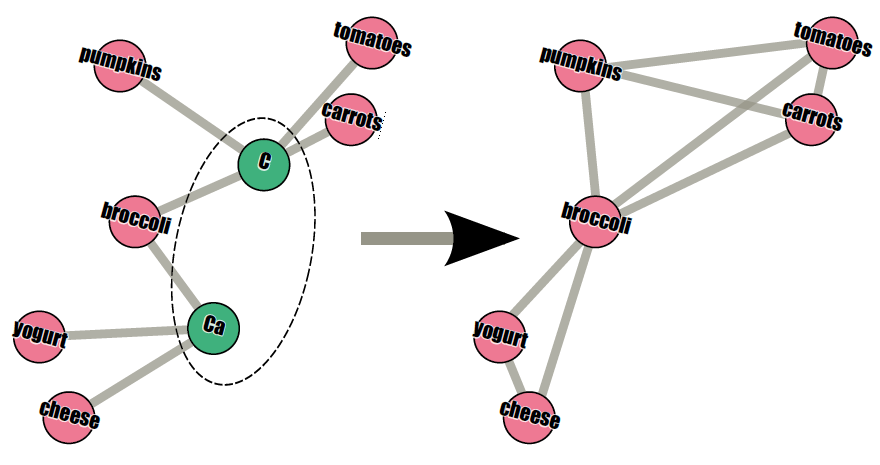
The above figure shows a fragment of the bipartite network of foods and nutrients before (left) and after the projection. The nodes C and Ca represent nutrients; they are the top nodes. All other nodes represent foods; they are the bottom nodes. Note that all food nodes connected to the same nutrient node in the original network form a clique in the induced network—the clique of foods providing that nutrient.

Function <mark>*bipartite.projected_graph(G, nodeset)*</mark> projects a bipartite graph G onto the nodes nodeset (the nodes must exist in G and belong to the same part). 

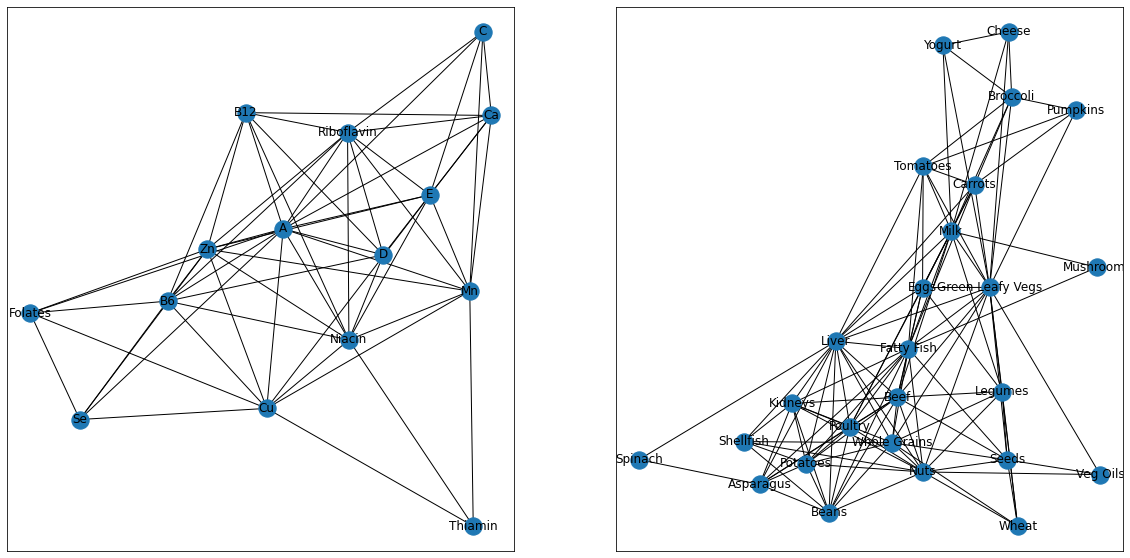

In [20]:
n_graph = bipartite.projected_graph(N, nutrients)
f_graph = bipartite.projected_graph(N, foods)

fig = plt.figure(figsize = (20,10))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

nx.draw_networkx(n_graph, ax = ax1)
nx.draw_networkx(f_graph, ax = ax2)

There may be over 1 top node connecting a pair of bottom nodes in the same network. You can assign weights to the induced edges to reflect the connections by calling the function <mark>*bipartite.weighted_projected_graph(G,nodeset,ratio=True)*</mark> (The last parameter controls whether the weights are absolute or relative)

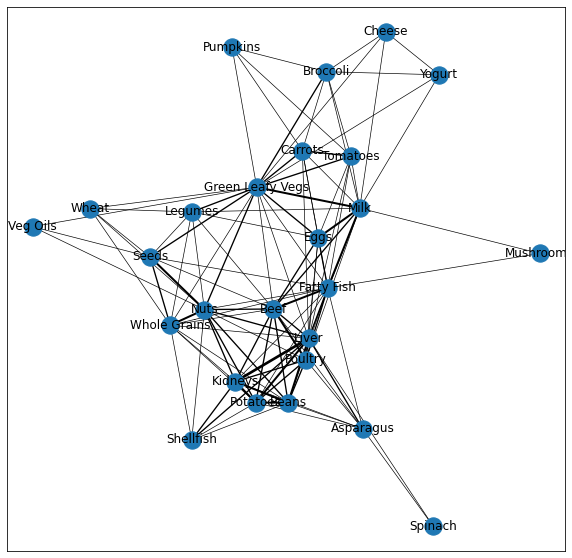

In [45]:
fw_graph = bipartite.weighted_projected_graph(N, foods, ratio = True)
fig = plt.figure(figsize = (10,10))
ax = plt.subplot()
nx.draw_networkx(fw_graph, ax = ax, width = [value['weight']*10 for value in dict(fw_graph.edges()).values()])
# edge width represents the weights. The weights represent the similarity between nodes

As an exercise, let's build a network based on the pearson correlation. Start by calculating the bi-adjacency matrix. A bi-adjacnecy matrix is like an incident matrix, except that the matrix rows and columns represent the top and bottom nodes, respectively. (You have to tell NetworkX which nodes are top and which are bottom by passing the list of bottom nodes as the second parameter.) For each pair of rows, compute the pearson correlation and arrange the results into a square pandas dataframe food. 

In [62]:
adj = bipartite.biadjacency_matrix(N, f_graph)
#  calculate the bi-adjacency matrix, where the rows and columns represent the top and bottom nodes
print(adj)
adj_array = adj.toarray()
#  columns represent the 15 nutrients, and rows represent the 26 foods
print(adj_array)

  (0, 12)	1
  (1, 3)	1
  (1, 11)	1
  (2, 3)	1
  (2, 4)	1
  (2, 6)	1
  (2, 8)	1
  (2, 13)	1
  (3, 1)	1
  (4, 10)	1
  (5, 2)	1
  (5, 4)	1
  (5, 6)	1
  (5, 7)	1
  (5, 12)	1
  (6, 10)	1
  (7, 2)	1
  (7, 3)	1
  (7, 4)	1
  (8, 3)	1
  (8, 4)	1
  (8, 8)	1
  (9, 2)	1
  (9, 9)	1
  (10, 5)	1
  :	:
  (16, 1)	1
  (16, 14)	1
  (17, 2)	1
  (17, 3)	1
  (17, 4)	1
  (17, 9)	1
  (17, 11)	1
  (17, 14)	1
  (18, 12)	1
  (18, 13)	1
  (19, 2)	1
  (19, 3)	1
  (19, 4)	1
  (20, 5)	1
  (21, 1)	1
  (21, 14)	1
  (22, 11)	1
  (23, 6)	1
  (23, 7)	1
  (23, 12)	1
  (24, 0)	1
  (24, 2)	1
  (24, 6)	1
  (24, 12)	1
  (25, 7)	1
[[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 1 0 1 0 1 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 1 0 1 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 1 0 1 0 0 1 1]
 [0 1 0 0 0 0 0 1 0 0 1 0 1 1 1]
 [0 0 1

In [79]:
# construct the pearson dataframe
pearson_list = []
for x in adj_array:
    x_array = []
    for y in adj_array:
        x_array.append(pearsonr(x,y)[0])
        # pearsonr returns pearson correlation coefficient and the p-value. only the coefficient is desired here.
    pearson_list.append(x_array)
foods_pearson = pd.DataFrame(pearson_list, columns = f_graph, index = f_graph)

# foods_pearson = pd.DataFrame([[pearsonr(x,y)[0] for x in adj_array] for y in adj_array], columns = f_graph, index = f_graph)
# # here is the condensed way for same implementation

'\n# another way to convert pearson dataframe into graph via stack and nx.Graph, but without weight\nstacked = foods_pearson.stack()\nedges = stacked[stacked>=slicing_threshold].index.to_list()\nf_pearson = nx.Graph(edges)\n'

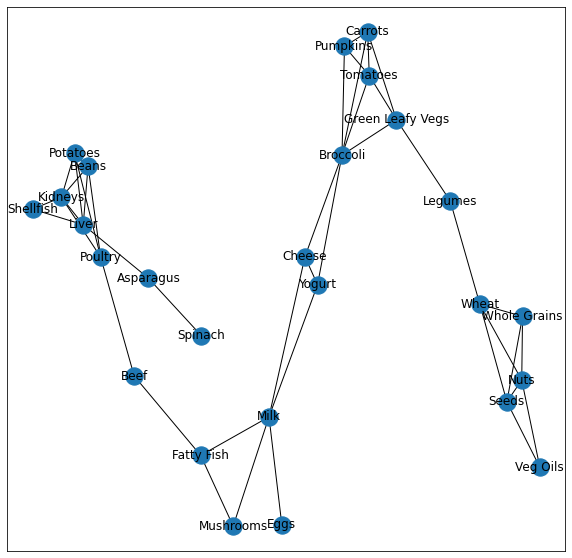

In [112]:
slicing_threshold = 0.375
foods_pearson_slice = foods_pearson[foods_pearson >= slicing_threshold]
stacked  = foods_pearson_slice.stack().to_dict()
stacked_dict = {(key[0], key[1], value) for key, value in stacked.items()}
f_pearson = nx.Graph()
f_pearson.add_weighted_edges_from(stacked_dict)


fig = plt.figure(figsize = (10,10))
ax = plt.subplot()
pos = nx.spring_layout(f_pearson)
nx.draw_networkx(f_pearson, pos = pos,ax = ax)

'''
# another way to convert pearson dataframe into graph via stack and nx.Graph, but without weight
stacked = foods_pearson.stack()
edges = stacked[stacked>=slicing_threshold].index.to_list()
f_pearson = nx.Graph(edges)
'''

The proposed algorithm can be extended to project bipartite networks using Euclidean, cosine, and any other reasonably defined distance measure. All of them have a subtle problem: they assume that all the top nodes are independent, and adjacency to each of them is equally important. Sometimes this assumption is correct; sometimes it is not. 

Consider the nutrients from our dataset. It includes vitamins B6 and B12, niacin (also a vitamin B), and riboflavin (yet another kind of vitamin B). All projection algorithms considered so far treat these four nutrient nodes separately. If a food item provides B6 but not B12 and another item provides B12 but not B6, they are not considered similar. But they would be—if you merged the four specific vitamin B nodes into one umbrella node.

If you have a strong reason to believe that some top nodes are more similar to each other than the others, you may want to compute the so-called generalized similarity.

## 3. Compute Generalized Similarity

Traditionally, two bottom nodes are considered similar if they are adjacent to the same top node or to a set of same top nodes. Kovacs proposed to weaken the definition of similarity. The new measure, dubbed “generalized similarity,” <mark> treats two bottom nodes as similar if they are adjacent to similar top nodes. </mark> But who decides whether two top nodes are similar? It is the reflexive definition of generalized similarity itself: <mark> two top nodes are similar if they are adjacent to similar bottom nodes.</mark> In fact, the algorithm for calculating the generalized similarity does not care whether a node is top or bottom. It splits a bipartite network into two parts and reports the similarities for each node pair in each class with respect to the nodes in the other class.